# CNOT

In [1]:
import numpy as np
import tensorcircuit as tc

In [2]:
def cx():
    c = tc.Circuit(4)
    
    # non-input states 
    c.h(2)
    c.h(3)
    
    # entangle
    c.cz(0, 2)
    c.cz(1, 2)
    c.cz(2, 3)
    
    # measure
    c.h(1)
    c.h(2)
    
    # correct
    c.multicontrol(1, 0, ctrl=[1], unitary=tc.gates.z())
    c.multicontrol(1, 3, ctrl=[1], unitary=tc.gates.z())
    c.multicontrol(2, 3, ctrl=[1], unitary=tc.gates.x())
    
    return c

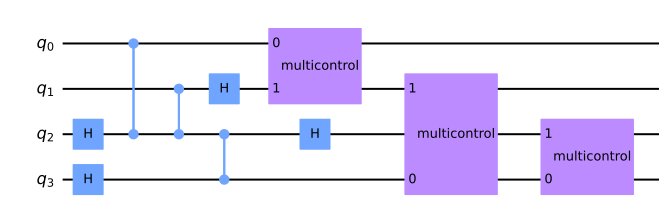

In [3]:
circ = cx()
circ.draw()

In [5]:
circ.measure(0, 3, with_prob=True)

(array([0., 0.], dtype=float32), 0.9999997615814209)